In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
dataset = pd.read_csv("DataSample.csv",sep=";")

In [3]:
dataset.head(n=10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75
5,female,group B,associate's degree,standard,none,71,83,78
6,female,group B,some college,standard,completed,88,95,92
7,male,group B,some college,free/reduced,none,40,43,39
8,male,group D,high school,free/reduced,completed,64,64,67
9,female,group B,high school,free/reduced,none,38,60,50


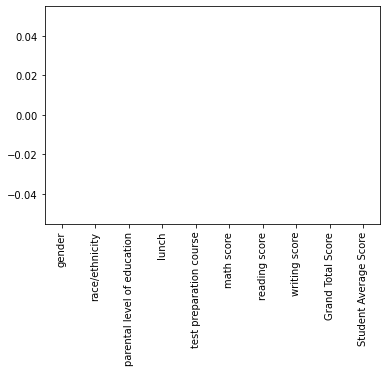

In [25]:
##checking if no missing value
#dataset.isna().sum()
#dataset.isna().any()
dataset.isna().sum().plot(kind="bar")
plt.show()

In [32]:
dataset.shape

(1000, 8)

In [4]:
##adding a column in a Dataframe --1
Grand_Total_Score = dataset["math score"] + dataset["reading score"]+ dataset["writing score"]
dataset['Grand Total Score'] = Grand_Total_Score
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grand Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229


In [5]:
##adding column in a Dataframe
Student_Avg_Score = round((dataset["math score"] + dataset["reading score"]+ dataset["writing score"])/3,2)
dataset['Student Average Score'] = Student_Avg_Score
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grand Total Score,Student Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282,94.00
996,male,group C,high school,free/reduced,none,62,55,55,172,57.33
997,female,group C,high school,free/reduced,completed,59,71,65,195,65.00
998,female,group D,some college,standard,completed,68,78,77,223,74.33


In [11]:
dataset['Student Average Score'].min()

9.0

In [37]:
### autocompletion
%config Completer.use_jedi = False

In [12]:
grouped_dataset = dataset.groupby("gender")
grouped_dataset.count()

,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grand Total Score,Student Average Score
gender,,,,,,,,,
female,518,518,518,518,518,518,518,518,518
male,482,482,482,482,482,482,482,482,482


In [6]:
## grouped data to male vs female student and how lunch influence the group score in average
grouped_dataset_gender_lunch = dataset.groupby(["gender","lunch"])[["math score","reading score", "writing score"]].mean()
grouped_dataset_gender_lunch

math score  reading score  writing score
gender lunch                                                 
female free/reduced   55.814815      67.386243      66.444444
       standard       68.124620      75.607903      75.927052
male   free/reduced   62.457831      61.542169      59.126506
       standard       72.022152      67.537975      65.509494

In [13]:
grouped_dataset.mean()

,math score,reading score,writing score,Grand Total Score,Student Average Score
gender,,,,,
female,63.633205,72.608108,72.467181,208.708494,69.569498
male,68.728216,65.473029,63.311203,197.512448,65.837303


In [14]:
grouped_dataset.std()

,math score,reading score,writing score,Grand Total Score,Student Average Score
gender,,,,,
female,15.491453,14.378245,14.844842,43.625427,14.541667
male,14.356277,13.931832,14.113832,41.096520,13.698944


In [15]:
grouped_dataset2 = dataset.groupby("parental level of education")

In [16]:
grouped_dataset2.count()

,gender,race/ethnicity,lunch,test preparation course,math score,reading score,writing score,Grand Total Score,Student Average Score
parental level of education,,,,,,,,,
associate's degree,222,222,222,222,222,222,222,222,222
bachelor's degree,118,118,118,118,118,118,118,118,118
high school,196,196,196,196,196,196,196,196,196
master's degree,59,59,59,59,59,59,59,59,59
some college,226,226,226,226,226,226,226,226,226
some high school,179,179,179,179,179,179,179,179,179


In [17]:
### Does parent level of education has influence on student's average score
grouped_dataset2.mean()

,math score,reading score,writing score,Grand Total Score,Student Average Score
parental level of education,,,,,
associate's degree,67.882883,70.927928,69.896396,208.707207,69.568964
bachelor's degree,69.389831,73.000000,73.381356,215.771186,71.923983
high school,62.137755,64.704082,62.448980,189.290816,63.097194
master's degree,69.745763,75.372881,75.677966,220.796610,73.598644
some college,67.128319,69.460177,68.840708,205.429204,68.476106
some high school,63.497207,66.938547,64.888268,195.324022,65.107654


In [18]:
### what is the deviation/variation from the mean
grouped_dataset2.std()

,math score,reading score,writing score,Grand Total Score,Student Average Score
parental level of education,,,,,
associate's degree,15.112093,13.868948,14.311122,41.012743,13.670522
bachelor's degree,14.943789,14.285250,14.728262,41.839827,13.947063
high school,14.539651,14.132130,14.085907,40.531749,13.510770
master's degree,15.153915,13.775163,13.730711,40.803051,13.600920
some college,14.312897,14.057049,15.012331,41.132921,13.711122
some high school,15.927989,15.479295,15.736197,44.952235,14.983877


### Selecting two or more columns in DataFrame

In [19]:
dataset[["race/ethnicity","math score"]]

,race/ethnicity,math score
0,group B,72
1,group C,69
2,group B,90
3,group A,47
4,group C,76
...,...,...
995,group E,88
996,group C,62
997,group C,59
998,group D,68


In [20]:
subset = dataset[["race/ethnicity","math score","gender"]]

In [57]:
### selecting columns in DataFrame using double [[]] creates another DataFrame
type(subset)

pandas.core.frame.DataFrame

In [21]:
language_Score = np.random.randint(45,100,1000)
language_Score.mean()

72.417

In [22]:
##checking the number of occurence --
frequency = pd.Series(language_Score).value_counts()

In [23]:
subset["Language Score"] = language_Score
subset

C:\Users\48502\AppData\Local\Temp/ipykernel_6032/2750175903.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset["Language Score"] = language_Score


,race/ethnicity,math score,gender,Language Score
0,group B,72,female,57
1,group C,69,female,62
2,group B,90,female,92
3,group A,47,male,79
4,group C,76,male,76
...,...,...,...,...
995,group E,88,female,60
996,group C,62,male,65
997,group C,59,female,71
998,group D,68,female,77


In [24]:
dataset["math score"].sum()

66089

In [25]:
MathMaxScore = dataset["math score"].max()
MathMaxScore

100

### Exporting Back Your Cleaned Data

In [26]:
dataset.to_csv("CleanStudentExamScore.csv", index=False)

In [27]:
dataset['gender'].value_counts()

female    518
male      482
Name: gender, dtype: int64

In [28]:
## 358 students completed the test preparation course
dataset['test preparation course'].value_counts()



#obtain the % vaule
#dataset['test preparation course'].value_counts(normalize=True)

none         642
completed    358
Name: test preparation course, dtype: int64

In [29]:
###Does completing the preparation course has impact in the student's test score
preparation_course = dataset.groupby("test preparation course")

In [30]:
##students who completed prep course in average scored above 70 in all tests
preparation_course.mean()

,math score,reading score,writing score,Grand Total Score,Student Average Score
test preparation course,,,,,
completed,69.695531,73.893855,74.418994,218.008380,72.669469
none,64.077882,66.534268,64.504673,195.116822,65.038801


In [31]:
dataset.head(n=10)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grand Total Score,Student Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33
5,female,group B,associate's degree,standard,none,71,83,78,232,77.33
6,female,group B,some college,standard,completed,88,95,92,275,91.67
7,male,group B,some college,free/reduced,none,40,43,39,122,40.67
8,male,group D,high school,free/reduced,completed,64,64,67,195,65.00
9,female,group B,high school,free/reduced,none,38,60,50,148,49.33


In [32]:
parent_education = dataset['parental level of education'].value_counts()

In [33]:
parent_education

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

In [11]:
type(parent_education)

pandas.core.series.Series

In [34]:
parent_education.min()

59

In [35]:
## Sort DataFrame --defining the order of sort!
dataset.sort_values(by=["Grand Total Score","math score","gender"],ascending=False)

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grand Total Score,Student Average Score
916,male,group E,bachelor's degree,standard,completed,100,100,100,300,100.00
458,female,group E,bachelor's degree,standard,none,100,100,100,300,100.00
962,female,group E,associate's degree,standard,none,100,100,100,300,100.00
114,female,group E,bachelor's degree,standard,completed,99,100,100,299,99.67
712,female,group D,some college,standard,none,98,100,99,297,99.00
...,...,...,...,...,...,...,...,...,...,...
17,female,group B,some high school,free/reduced,none,18,32,28,78,26.00
327,male,group A,some college,free/reduced,none,28,23,19,70,23.33
596,male,group B,high school,free/reduced,none,30,24,15,69,23.00
980,female,group B,high school,free/reduced,none,8,24,23,55,18.33


In [36]:
##using lambda function to convert into lower case before perform sort
dataset.sort_values(by=["parental level of education"], ascending=True,
                   key=lambda coln: coln.str.lower())

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grand Total Score,Student Average Score
669,male,group D,associate's degree,standard,completed,81,72,77,230,76.67
457,male,group D,associate's degree,free/reduced,none,53,54,48,155,51.67
454,female,group C,associate's degree,free/reduced,none,53,61,62,176,58.67
452,female,group C,associate's degree,free/reduced,none,65,77,74,216,72.00
173,female,group C,associate's degree,standard,none,63,67,70,200,66.67
...,...,...,...,...,...,...,...,...,...,...
513,female,group B,some high school,standard,completed,54,61,62,177,59.00
515,female,group C,some high school,standard,completed,76,87,85,248,82.67
265,male,group D,some high school,free/reduced,none,59,42,41,142,47.33
853,male,group E,some high school,standard,none,82,67,61,210,70.00


In [11]:
## 116 students scored above 85 in each exams
top_student = dataset.loc[:,'Grand Total Score'] >= 255
##top_student = pd.DataFrame(top_student)
dataset[top_student]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grand Total Score,Student Average Score
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
6,female,group B,some college,standard,completed,88,95,92,275,91.67
16,male,group C,high school,standard,none,88,89,86,263,87.67
34,male,group E,some college,standard,none,97,87,82,266,88.67
94,female,group B,some college,standard,none,79,86,92,257,85.67
...,...,...,...,...,...,...,...,...,...,...
962,female,group E,associate's degree,standard,none,100,100,100,300,100.00
970,female,group D,bachelor's degree,standard,none,89,100,100,289,96.33
979,female,group C,associate's degree,standard,none,91,95,94,280,93.33
983,female,group A,some college,standard,completed,78,87,91,256,85.33


In [54]:
top_student.value_counts()

False    884
True     116
Name: Grand Total Score, dtype: int64

In [8]:
##let use for loop to add a column in the dataset --1st approach
for col_name, row_value in dataset.iterrows():
    dataset.loc[col_name,'Character counter'] = len(row_value['parental level of education'])
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Student Average Score,Character counter
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,17.0
1,female,group C,some college,standard,completed,69,90,88,82.33,12.0
2,female,group B,master's degree,standard,none,90,95,93,92.67,15.0
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,18.0
4,male,group C,some college,standard,none,76,78,75,76.33,12.0


In [9]:
##this is more efficient approach than 1st approach
dataset['Character_counter2'] = dataset['test preparation course'].apply(len)
dataset

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Student Average Score,Character counter,Character_counter2
0,female,group B,bachelor's degree,standard,none,72,72,74,72.67,17.0,4
1,female,group C,some college,standard,completed,69,90,88,82.33,12.0,9
2,female,group B,master's degree,standard,none,90,95,93,92.67,15.0,4
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.33,18.0,4
4,male,group C,some college,standard,none,76,78,75,76.33,12.0,4
...,...,...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,94.00,15.0,9
996,male,group C,high school,free/reduced,none,62,55,55,57.33,11.0,4
997,female,group C,high school,free/reduced,completed,59,71,65,65.00,11.0,9
998,female,group D,some college,standard,completed,68,78,77,74.33,12.0,9


In [18]:
##female student with math score greater or equal to 90
mathscore_f_90 = dataset[(dataset["math score"] >= 90) &(dataset["gender"] == "female")]
mathscore_f_90.describe()

,math score,reading score,writing score
count,23.000000,23.000000,23.000000
mean,94.826087,96.478261,96.434783
std,3.393204,4.718143,4.367505
min,90.000000,86.000000,84.000000
25%,92.000000,94.000000,93.500000
50%,94.000000,100.000000,99.000000
75%,97.500000,100.000000,100.000000
max,100.000000,100.000000,100.000000


In [9]:
type(mathscore_f_90)

pandas.core.frame.DataFrame

In [11]:
##only two female student who had free lunch scored above 90 in maths
mathscore_f_90[mathscore_f_90["lunch"] == "free/reduced"]

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
566,female,group E,bachelor's degree,free/reduced,completed,92,100,100
903,female,group D,bachelor's degree,free/reduced,completed,93,100,100


In [17]:
## 35 male students as oppose to 23 female students had math score above 90
mathscore_m_90 = dataset[(dataset["math score"] >= 90) &(dataset["gender"] == "male")]
#mathscore_m_90.count()
mathscore_m_90.describe()

,math score,reading score,writing score
count,35.000000,35.000000,35.000000
mean,94.028571,86.742857,85.057143
std,3.476693,7.175706,7.045828
min,90.000000,73.000000,69.000000
25%,91.000000,83.000000,81.000000
50%,94.000000,87.000000,85.000000
75%,97.000000,90.000000,90.500000
max,100.000000,100.000000,100.000000


In [14]:
##how many of the male who scored above 90 in maths are on free meal
mathscore_m_90[mathscore_m_90["lunch"] == "free/reduced"]

gender                         35
race/ethnicity                 35
parental level of education    35
lunch                          35
test preparation course        35
math score                     35
reading score                  35
writing score                  35
dtype: int64

In [4]:
## function to compute 30th percentile of student score e.g in math

def percent_30(column):
    return column.quantile(0.3)

In [7]:
dataset["math score"].agg(percent_30)

59.0

In [8]:
dataset["reading score"].agg(percent_30)

62.0

In [10]:
dataset[["reading score","math score"]].agg(percent_30)

reading score    62.0
math score       59.0
dtype: float64

In [13]:
def percent_40(column):
    return column.quantile(0.4)

In [15]:
dataset["reading score"].agg([percent_30, percent_40])

percent_30    62.0
percent_40    66.0
Name: reading score, dtype: float64

### Visualizing Student Exam Score

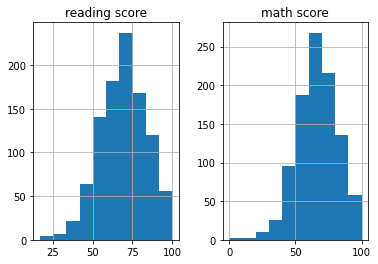

In [10]:
dataset[["reading score","math score"]].hist()
plt.show()

In [12]:
dataset.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Grand Total Score,Student Average Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218,72.67
1,female,group C,some college,standard,completed,69,90,88,247,82.33
2,female,group B,master's degree,standard,none,90,95,93,278,92.67
3,male,group A,associate's degree,free/reduced,none,47,57,44,148,49.33
4,male,group C,some college,standard,none,76,78,75,229,76.33


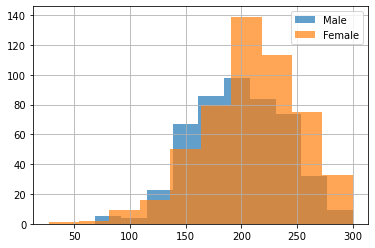

In [20]:
dataset[dataset["gender"]== "male"]["Grand Total Score"].hist(alpha=0.7)
dataset[dataset["gender"]== "female"]["Grand Total Score"].hist(alpha=0.7)
plt.legend(["Male", "Female"])
plt.show()